<a href="https://colab.research.google.com/github/arunoda/fastai-v4/blob/master/06_1_multi_cat_cats_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cats and Dog model with Mult Cat**

With this, we can try to see whether it could discard any non dog or cat images.

## Setting Up on Colab

You only need to run this on Colab.

In [1]:
!pip install fastai2
!git clone https://github.com/arunoda/fastai-v4
%cd fastai-v4
!pwd

     |████████████████████████████████| 194kB 9.5MB/s 
Cloning into 'fastai-v4'...
remote: Enumerating objects: 92, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 114 (delta 44), reused 49 (delta 12), pack-reused 22
Receiving objects: 100% (114/114), 128.44 MiB | 32.45 MiB/s, done.
Resolving deltas: 100% (47/47), done.
/content/fastai-v4
/content/fastai-v4


In [0]:
from fastai2.vision.all import *

## Load the Dataset

Loading the pets dataset

In [3]:
dataset = untar_data(URLs.PETS)

In [6]:
image_files = (dataset/"images").ls()
image_files

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_173.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Birman_183.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_174.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/great_pyrenees_185.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/leonberger_171.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_bulldog_68.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_111.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_177.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_158.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/pomeranian_60.jpg')...]

In [4]:
dataset.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [0]:
def get_category(p):
  if p.name[0].isupper():
    return ['cat']
  else:
    return ['dog']

db = DataBlock(
    blocks = (ImageBlock, MultiCategoryBlock),
    get_items = get_image_files,
    get_y = get_category,
    item_tfms = Resize(224),
    splitter = RandomSplitter(0.3)
)

In [0]:
dls = db.dataloaders(dataset/"images")

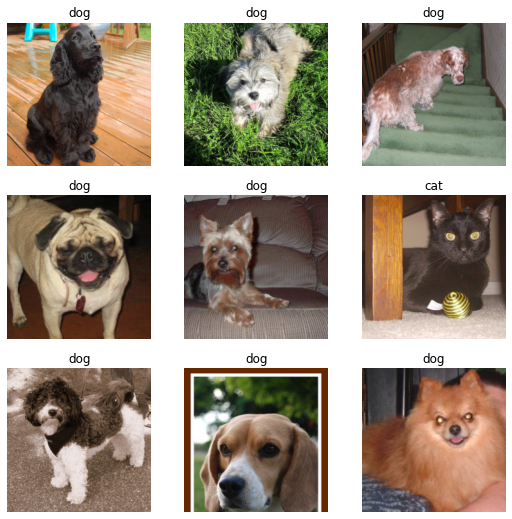

In [13]:
dls.show_batch()

## Creating the Model

In [0]:
learn = cnn_learner(dls, resnet34, metrics=accuracy_multi)

SuggestedLRs(lr_min=0.005754399299621582, lr_steep=0.0005754399462603033)

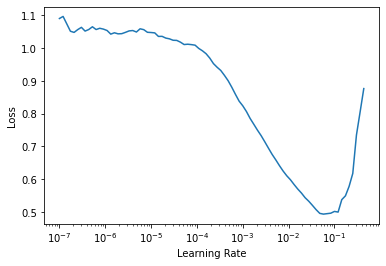

In [15]:
learn.lr_find()

In [19]:
learn.fine_tune(2, base_lr=1e-3)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.210310,0.026886,0.991204,00:46


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.038064,0.020186,0.992558,00:47
1,0.019460,0.012662,0.995489,00:47


## Making Predictions

In [0]:
from ipywidgets import widgets

In [0]:
uploader = widgets.FileUpload()

In [22]:
uploader

FileUpload(value={}, description='Upload')

((#1) ['dog'], tensor([False,  True]), tensor([2.0846e-04, 9.9980e-01]))

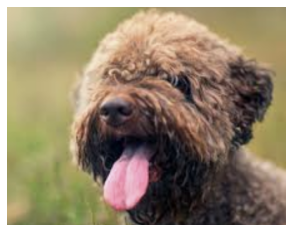

In [25]:
uploaded_image = PILImage.create(uploader.data[-1])
show_image(uploaded_image)
learn.predict(uploaded_image)

In [26]:
uploader

FileUpload(value={'Screenshot 2020-05-16 at 23.19.03.png': {'metadata': {'lastModified': 1589651345574, 'type'…

((#1) ['cat'], tensor([ True, False]), tensor([1.0000e+00, 2.9596e-07]))

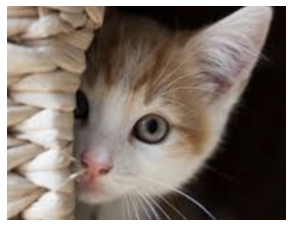

In [27]:
uploaded_image = PILImage.create(uploader.data[-1])
show_image(uploaded_image)
learn.predict(uploaded_image)

In [28]:
uploader

FileUpload(value={'Screenshot 2020-05-16 at 23.18.04.png': {'metadata': {'lastModified': 1589651287695, 'type'…

((#2) ['cat','dog'], tensor([True, True]), tensor([0.7006, 0.7458]))

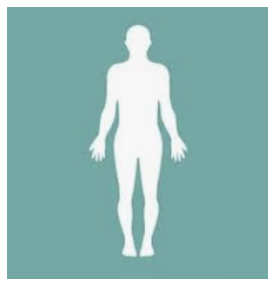

In [29]:
uploaded_image = PILImage.create(uploader.data[-1])
show_image(uploaded_image)
learn.predict(uploaded_image)

In [30]:
uploader

FileUpload(value={'Screenshot 2020-05-18 at 12.19.51.png': {'metadata': {'lastModified': 1589784594340, 'type'…

((#1) ['dog'], tensor([False,  True]), tensor([0.0689, 0.8792]))

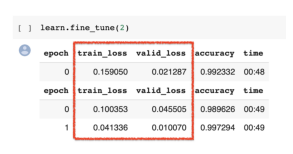

In [31]:
uploaded_image = PILImage.create(uploader.data[-1])
show_image(uploaded_image)
learn.predict(uploaded_image)

## Conclusion

Even with multi categories, we cannot our predictions are still random and undefined for none cat/dog images.

Ideally it should give us no predictions at all.